### How does a coin toss ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
g =9.81

In [2]:
def w_relation(u,n):
    return (2*n+0.5)*np.pi*g/(2*u)

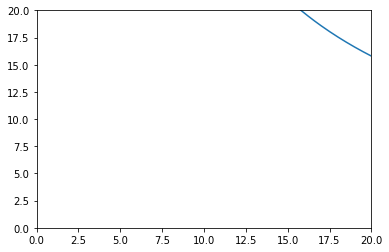

In [3]:
u = np.linspace(0.1,100,1000)
plt.plot(u,w_relation(u,10))

plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

In [4]:
w_relation(w_relation(20,10),10)

20.0

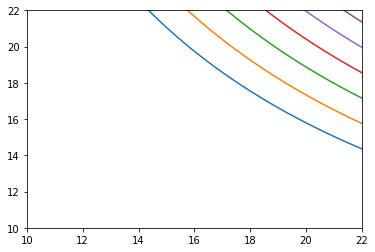

In [5]:
u = np.linspace(0.1,100,1000)
for n in range(10,18):
    plt.plot(u,w_relation(u,n))
plt.xlim(10,22)
plt.ylim(10,22)
plt.show()

In [6]:
u_0=10000

In [7]:
def diag_length(n,u_0 = u_0):
    return (2*n-1)*np.pi*g/(2*np.sqrt(2)*u_0)

In [8]:
def prob_from_diagonals(d,u_0 =u_0):
    d_1 = diag_length(1,u_0)
    return 1- (d-d_1)**2/d**2

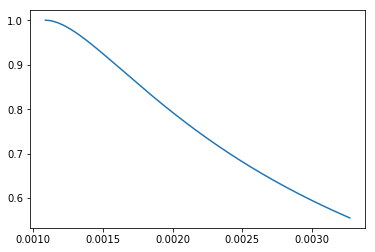

In [9]:
dspace = np.linspace(diag_length(1),diag_length(2),1000)
plt.plot(dspace, prob_from_diagonals(dspace))
plt.show()

In [10]:
min(prob_from_diagonals(dspace))

0.55555555555555547

In [56]:
def prob_dist(d,u_0 =u_0):
    region_1  = 0.5*(d**2-(d-diag_length(1,u_0))**2)
    n = np.floor(0.5*(d/diag_length(1,u_0)+1))
    prob_regions = [region_1]
    for i in range(1,int(n)):
        region_x = (2*d- diag_length(i,u_0)-diag_length(i+1,u_0))*diag_length(1,u_0)
        prob_regions.append(region_x)
    region_c = 0.5*(d-diag_length(n,u_0))**2
    prob_regions.append(region_c)
    return np.array(prob_regions)/(0.5*d**2)

In [68]:
def plot_prob_dist(d):
    return sum(prob_dist(d)[::2])

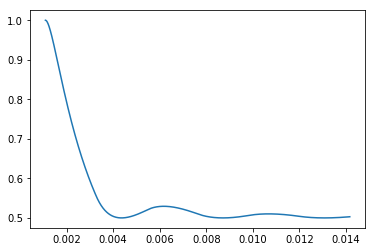

In [71]:
dspace = np.linspace(diag_length(1),diag_length(7),1000)
plt_vector = [plot_prob_dist(d)  for d in dspace]
plt.plot(dspace, plt_vector)
plt.show()